# Лабороторная работа №1

In [ ]:
#### Модифицировал run.sh следующим образом:
# for n in `seq $1 $2 $3`
# do 
#  echo 'n = ' $n
#  ./cache $n
# done

#### Запускаем программу для интервала n [1000,2000] с шагом 10

In [ ]:
#./run.sh 1000 10 2000 > 1000-2000.log

#### Запускаем программу для интервала n [1000,1100] с шагом 1

In [ ]:
#./run.sh 1000 1 1100 > 1000-1100.log

#### Написал функцию, которая парсит логи с результатами

In [3]:
def read_log_file (path):
    '''
    :return
        * results = {Simple: [(1000, 0.8932), ... ,], Block: [(1000, 0.8932), ... ,], Swapped: [(1000, 0.8932), ... ,]}
    '''

    results = dict()
    for line in open(path):
        if 'n = ' in line:
            n = int(line.split("=")[1])
        elif 'time' in line:
            method = line.split(":")[0][4:]
            value = float(line.split(":")[1])
            results[method] = results.get(method, list())
            pair = (n, value)
            results[method].append(pair)
    return results

#### С помощью модуля matplotlib выведем результат в виде линейных графиков 

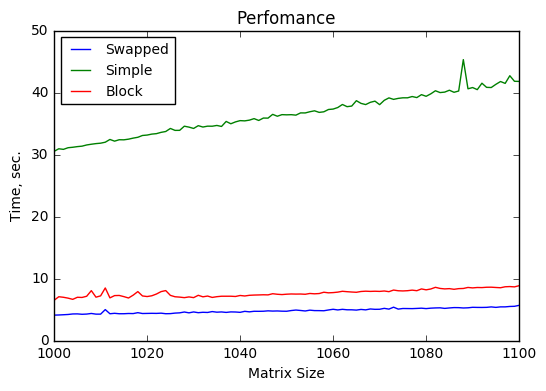

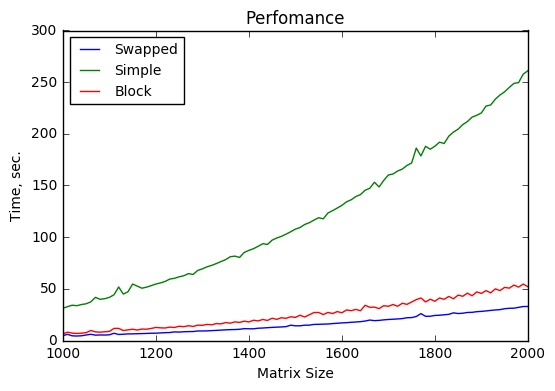

In [10]:
import matplotlib.pyplot as plt

def plot_results(results):
    methods = results.keys()

    for method in methods:
        plt.plot([row[0] for row in results[method]], [row[1] for row in results[method]], label=method)
        plt.legend(loc=2, fontsize=10)
        plt.xlabel('Matrix Size')
        plt.ylabel('Time, sec.')
        plt.title('Perfomance')

    plt.show()

results2000 = read_log_file("1000-2000.log")
results1100 = read_log_file("1000-1100.log")

plot_results(results1100)
plot_results(results2000)

#### Характеристики виртуальной машины:
ОС: Ubuntu Server 16.04.1 (32-bit)
RAM: 512Mb
CPU: Intel Core i3 380M, 2.53 GHz, L1 32Kb, L2 256Kb, L3 3Mb 

#### Анализ графиков:

- Из трех алгоритмов бесспорно наиболее эффективным является Swapped. Время его выполнения растет с наименьшей скоростью, что говорит о его эффективности и масштабируемости.
- Simple алгоритм в несколько раз медленнее остальных и с увеличением размера матрицы этот разрыв только растет.
- У алгоритма Simple виден сильный "всплеск" n~1090. Это можно обьяснить чрезмерным кол-вом cache-miss-ов по причине концентрации элементов матрицы в одном cache set-е.
- На обоих графиках видно, что определенные "всплески" времени обработки характерны сразу для всех 3-х алгоритмов (n~1010, n~1110, n~1780)
- У алгоритма Block с увеличением N все более отчетливо начинают прослеживаться периодические колебания времени выполнения.
- У на нижнем графике у алгоритма Simple при n > 1200 можно увидеть определенные "проседания вниз" от общего роста графика, которые имеют место быть с периодичностью n~100
